# Titanic Survival project

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.preprocessing import LabelEncoder


In [38]:
df = pd.read_csv("tested.csv")
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


## EDA

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [34]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [35]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [39]:
df.drop(['Passengerid','zero', 'zero.1','zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6','zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14','zero.15', 'zero.16','zero.17','zero.18' ],axis=1,inplace=True)

In [40]:
df.columns

Index(['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked',
       '2urvived'],
      dtype='object')

In [41]:
df.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [42]:
df.describe()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1307.000000,1309.000000
mean,29.503186,33.281086,0.355997,0.498854,0.385027,2.294882,1.492731,0.261268
std,12.905241,51.741500,0.478997,1.041658,0.865560,0.837836,0.814626,0.439494
min,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,80.000000,512.329200,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1309 non-null   float64
 1   Fare      1309 non-null   float64
 2   Sex       1309 non-null   int64  
 3   sibsp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Pclass    1309 non-null   int64  
 6   Embarked  1307 non-null   float64
 7   2urvived  1309 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 81.9 KB


In [44]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

1. As we have replace the null Values with the Mean Values.
2.Next we will be focusing on fare value as it has 1 null value so we will delete one cell Row 
wise so it will equally workout.

In [45]:
df.dropna(subset=["Embarked"], inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1307 non-null   float64
 1   Fare      1307 non-null   float64
 2   Sex       1307 non-null   int64  
 3   sibsp     1307 non-null   int64  
 4   Parch     1307 non-null   int64  
 5   Pclass    1307 non-null   int64  
 6   Embarked  1307 non-null   float64
 7   2urvived  1307 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 91.9 KB


In [47]:
df.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [48]:
df = df.rename(columns={'2urvived': 'Survived'})

In [49]:
df.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [50]:
df.groupby(['Sex', 'Survived']).size()

Sex  Survived
0    0           734
     1           109
1    0           233
     1           231
dtype: int64

In [51]:
df['Sex'].value_counts()

Sex
0    843
1    464
Name: count, dtype: int64

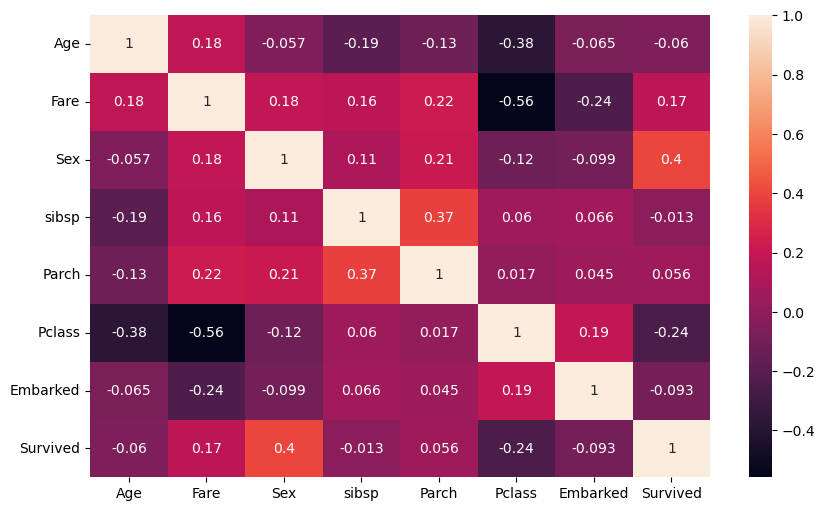

In [52]:
corr = df.corr
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [53]:
df.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [54]:
df['Parch'].value_counts()

Parch
0    1000
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

In [55]:
df['sibsp'].value_counts()

sibsp
0    889
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

In [56]:
df['Embarked'].value_counts()

Embarked
2.0    914
0.0    270
1.0    123
Name: count, dtype: int64

In [57]:
df['Embarked'] = df['Embarked'].astype(int)

In [58]:
df.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,22.0,7.2500,0,1,0,3,2,0
1,38.0,71.2833,1,1,0,1,0,1
2,26.0,7.9250,1,0,0,3,2,1
3,35.0,53.1000,1,1,0,1,2,1
4,35.0,8.0500,0,0,0,3,2,0


In [59]:
X = df.drop("Survived",axis=1)
y =df['Survived']

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state =42)

In [61]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [62]:
y_pred = model.predict(X_test)

In [63]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [64]:
y_test

1166    0
1049    0
794     0
1059    0
723     0
       ..
573     1
141     1
889     1
313     0
200     0
Name: Survived, Length: 262, dtype: int64

In [70]:
Acc = accuracy_score(y_test,y_pred)

In [71]:
print(f"Accuracy Test Result :{round(Acc*100,2)}%")

Accuracy Test Result :79.01%


In [72]:
confusion_matrix(y_test,y_pred)

array([[183,   9],
       [ 46,  24]], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       192
           1       0.73      0.34      0.47        70

    accuracy                           0.79       262
   macro avg       0.76      0.65      0.67       262
weighted avg       0.78      0.79      0.76       262



In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

In [76]:
df.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,22.0,7.2500,0,1,0,3,2,0
1,38.0,71.2833,1,1,0,1,0,1
2,26.0,7.9250,1,0,0,3,2,1
3,35.0,53.1000,1,1,0,1,2,1
4,35.0,8.0500,0,0,0,3,2,0


In [77]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [92]:
X_train_scaled

array([[-0.99427003,  0.23102728, -0.76219287, ..., -0.43734337,
        -1.51725715,  0.61860675],
       [ 1.59937977,  1.32634796, -0.76219287, ..., -0.43734337,
        -1.51725715, -1.84403727],
       [-0.28691099,  0.81722925,  1.31200387, ..., -0.43734337,
        -1.51725715,  0.61860675],
       ...,
       [-0.75848368, -0.38263847, -0.76219287, ..., -0.43734337,
        -0.3278095 , -1.84403727],
       [ 1.44218888, -0.15985034,  1.31200387, ..., -0.43734337,
        -1.51725715,  0.61860675],
       [-0.75848368, -0.50518699, -0.76219287, ..., -0.43734337,
         0.86163816, -1.84403727]])

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn_model = KNeighborsClassifier(n_neighbors= 5)
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [82]:
y_pred_knn = knn_model.predict(X_test_scaled)

In [84]:
Acc_knn = accuracy_score(y_test,y_pred_knn)

In [85]:
print(f"Accuracy Test Result :{round(Acc_knn*100,2)}%")

Accuracy Test Result :75.95%


In [93]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       192
           1       0.58      0.37      0.45        70

    accuracy                           0.76       262
   macro avg       0.69      0.64      0.65       262
weighted avg       0.74      0.76      0.74       262



In [94]:
confusion_matrix(y_test,y_pred_knn)

array([[173,  19],
       [ 44,  26]], dtype=int64)

In [95]:
from sklearn.naive_bayes import GaussianNB

In [97]:
model_NB = GaussianNB()

In [98]:
model_NB.fit(X_train,y_train)

GaussianNB()

In [99]:
y_pred_NB = model_NB.predict(X_test)

In [100]:
y_pred_NB

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [101]:
Acc_NB = accuracy_score(y_test,y_pred_NB)

In [102]:
print(f"Accuracy Test Result :{round(Acc_NB*100,2)}%")

Accuracy Test Result :73.66%


In [103]:
confusion_matrix(y_test,y_pred_NB)

array([[178,  14],
       [ 55,  15]], dtype=int64)

In [104]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       192
           1       0.52      0.21      0.30        70

    accuracy                           0.74       262
   macro avg       0.64      0.57      0.57       262
weighted avg       0.70      0.74      0.69       262



In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
model_DT = DecisionTreeClassifier(random_state=42)

In [107]:
model_DT.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [108]:
y_pred_DT = model_DT.predict(X_test_scaled)

In [109]:
y_pred_DT

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [110]:
y_test

1166    0
1049    0
794     0
1059    0
723     0
       ..
573     1
141     1
889     1
313     0
200     0
Name: Survived, Length: 262, dtype: int64

In [111]:
Acc_DT = accuracy_score(y_test,y_pred_DT)

In [112]:
print(f"Accuracy Test Result :{round(Acc_DT*100,2)}%")

Accuracy Test Result :73.66%


In [113]:
confusion_matrix(y_test,y_pred_DT)

array([[167,  25],
       [ 44,  26]], dtype=int64)

In [114]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       192
           1       0.51      0.37      0.43        70

    accuracy                           0.74       262
   macro avg       0.65      0.62      0.63       262
weighted avg       0.72      0.74      0.72       262



In [115]:
from sklearn.svm import SVC

In [116]:
model_svm = SVC(kernel = 'linear')

In [117]:
model_svm.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [118]:
y_pred_svc = model_svm.predict(X_test_scaled)

In [119]:
Acc_svm =accuracy_score(y_test,y_pred_svc)

In [120]:
print(f"Accuracy Test Result :{round(Acc_svm*100,2)}%")

Accuracy Test Result :77.48%


In [121]:
confusion_matrix(y_test,y_pred_svc)

array([[181,  11],
       [ 48,  22]], dtype=int64)

In [122]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       192
           1       0.67      0.31      0.43        70

    accuracy                           0.77       262
   macro avg       0.73      0.63      0.64       262
weighted avg       0.76      0.77      0.74       262



In [123]:
print(f"Accuracy For Logistic Regression Test Result :{round(Acc*100,2)}%")
print(f"Accuracy KNeighbours Test Result :{round(Acc_knn*100,2)}%")
print(f"Accuracy NaiveBais Test Result :{round(Acc_NB*100,2)}%")
print(f"Accuracy DecisionTreeTest Result :{round(Acc_DT*100,2)}%")
print(f"Accuracy SVM Vector Test Result :{round(Acc_svm*100,2)}%")

Accuracy For Logistic Regression Test Result :79.01%
Accuracy KNeighbours Test Result :75.95%
Accuracy NaiveBais Test Result :73.66%
Accuracy DecisionTreeTest Result :73.66%
Accuracy SVM Vector Test Result :77.48%


In [129]:
print("Logistic Regression Confusion Matrix :",)
print("KNeighbour Confusion Maxtrix :",confusion_matrix(y_test,y_pred_knn))
print("Naive Bais Confusion Matrix :",confusion_matrix(y_test,y_pred_NB))
print("Decision Tree Confusion Matrix :",confusion_matrix(y_test,y_pred_DT))
print("SVM Confusion Matrix :",confusion_matrix(y_test,y_pred_svc))

SVM Confusion Matrix :               precision    recall  f1-score   support

           0       0.79      0.94      0.86       192
           1       0.67      0.31      0.43        70

    accuracy                           0.77       262
   macro avg       0.73      0.63      0.64       262
weighted avg       0.76      0.77      0.74       262

